# [E-02] (1) 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## 목적 : 환자의 정보가 담긴 데이터를 통해 당뇨병 수치 예측

In [1]:
# 당뇨병 데이터 가져오기
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

In [2]:
# diabets 데이터에 대한 설명
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
# diabetes에 어떤 값이 있는지 확인
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
# diabets의 특성 확인
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
# 특성 갯수 확인
len(diabetes.feature_names)

10

In [6]:
# data와 target 받아오기
df_X=diabetes.data
df_y=diabetes.target

In [7]:
# data와 target 모양 확인
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [8]:
# 모델에 입력할 데이터 X, y 준비하기
import numpy as np

X = np.array(df_X)
y = np.array(df_y)

In [9]:
# train 데이터와 test 데이터로 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [10]:
# 입력데이터 개수에 맞는 W, b 준비
import numpy as np

W = np.random.rand(10)
b = np.random.rand()

In [12]:
# W 확인
W

array([0.20653121, 0.64615541, 0.56942914, 0.46535541, 0.82512506,
       0.79999258, 0.79523201, 0.3047581 , 0.45349477, 0.11527838])

In [14]:
# b 확인
b

0.003959080506089729

In [15]:
# 모델 함수 구현
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [16]:
# 손실함수 구현 
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [17]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [18]:
# 기울기 함수
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [19]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.61058131  -13.7672025  -189.61801023 -142.66355857  -68.18057922
  -55.92989971  127.76719092 -139.04995712 -182.89806719 -123.57725363]
db: -304.2590501647797


In [20]:
# 학습률
LEARNING_RATE = 0.01

In [21]:
# 손실함수, 기울기 함수를 활용해 경사하강법으로 모델 학습
losses = []

for i in range(1, 5000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 21531.2895
Iteration 20 : Loss 16021.0607
Iteration 30 : Loss 12292.4448
Iteration 40 : Loss 9757.9840
Iteration 50 : Loss 8025.0181
Iteration 60 : Loss 6830.9699
Iteration 70 : Loss 6000.1440
Iteration 80 : Loss 5414.8848
Iteration 90 : Loss 4996.3207
Iteration 100 : Loss 4691.5062
Iteration 110 : Loss 4464.8349
Iteration 120 : Loss 4292.3046
Iteration 130 : Loss 4157.6856
Iteration 140 : Loss 4049.9596
Iteration 150 : Loss 3961.6084
Iteration 160 : Loss 3887.4683
Iteration 170 : Loss 3823.9638
Iteration 180 : Loss 3768.5939
Iteration 190 : Loss 3719.5876
Iteration 200 : Loss 3675.6727
Iteration 210 : Loss 3635.9199
Iteration 220 : Loss 3599.6373
Iteration 230 : Loss 3566.2998
Iteration 240 : Loss 3535.5000
Iteration 250 : Loss 3506.9157
Iteration 260 : Loss 3480.2865
Iteration 270 : Loss 3455.3984
Iteration 280 : Loss 3432.0724
Iteration 290 : Loss 3410.1565
Iteration 300 : Loss 3389.5205
Iteration 310 : Loss 3370.0510
Iteration 320 : Loss 3351.6491
Iteration 330 

Iteration 2890 : Loss 2897.8952
Iteration 2900 : Loss 2897.8753
Iteration 2910 : Loss 2897.8556
Iteration 2920 : Loss 2897.8361
Iteration 2930 : Loss 2897.8169
Iteration 2940 : Loss 2897.7979
Iteration 2950 : Loss 2897.7791
Iteration 2960 : Loss 2897.7606
Iteration 2970 : Loss 2897.7422
Iteration 2980 : Loss 2897.7241
Iteration 2990 : Loss 2897.7061
Iteration 3000 : Loss 2897.6883
Iteration 3010 : Loss 2897.6708
Iteration 3020 : Loss 2897.6534
Iteration 3030 : Loss 2897.6362
Iteration 3040 : Loss 2897.6192
Iteration 3050 : Loss 2897.6024
Iteration 3060 : Loss 2897.5857
Iteration 3070 : Loss 2897.5692
Iteration 3080 : Loss 2897.5529
Iteration 3090 : Loss 2897.5367
Iteration 3100 : Loss 2897.5207
Iteration 3110 : Loss 2897.5049
Iteration 3120 : Loss 2897.4892
Iteration 3130 : Loss 2897.4736
Iteration 3140 : Loss 2897.4582
Iteration 3150 : Loss 2897.4429
Iteration 3160 : Loss 2897.4278
Iteration 3170 : Loss 2897.4128
Iteration 3180 : Loss 2897.3979
Iteration 3190 : Loss 2897.3832
Iteratio

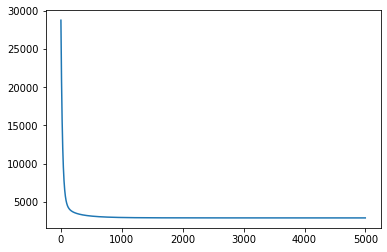

In [22]:
# 손실함수 그래프 
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [23]:
W, b

(array([  41.79705584, -240.20655827,  557.0406246 ,  342.43075069,
        -124.339001  , -110.65684138, -203.76392151,  155.65950403,
         427.81912239,   56.84521362]),
 151.30358863692803)

In [24]:
# test 데이터의 loss 값
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2884.642300426838

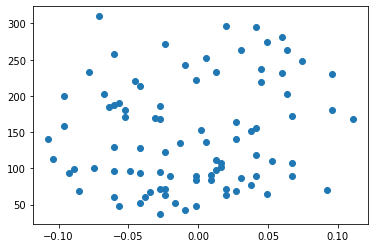

In [25]:
# 정답 데이터 시각화
plt.scatter(X_test[:, 0], y_test)

plt.show()

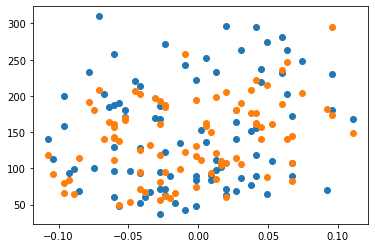

In [26]:
# 정답 데이터와 예측 데이터 비교 시각화
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)

plt.show()

# 평가

- 처음엔 loss값이 매우 높게 나왔지만 학습률을 조정해서 2884로 만듦.

# 회고

- loss 값을 3000이하로 만들려고 여러 방법을 써서 시도했지만 학습률을 조정하는게 제일 안정적으로 loss값이 내려감.
- 정답 데이터와 예측 데이터를 비교하여 시각화 했지만 그렇게 많이 맞는지는 잘 모르겠음.